In [19]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np

### Load Real Image

In [20]:
load_cyclone_image = cv2.imread('HistogramDataset/01-05-2019  030000.jpg')

In [21]:
cv2.imshow("cyclone Image",load_cyclone_image)
cv2.waitKey()==13
cv2.destroyAllWindows()

### Crop cyclone image

In [22]:
cyclone_image = load_cyclone_image[500:,200:,:]

In [23]:
cv2.imshow('cyclone crop iamge', cyclone_image)
cv2.waitKey()==13
cv2.destroyAllWindows()

### noise cancellation

In [24]:
kernel1 = np.ones( (3,3), dtype=np.uint8 )

In [27]:
erode_img1 = cv2.erode(cyclone_image,kernel1,iterations=2)
dil_img1 = cv2.dilate(erode_img1,kernel1,iterations=1)

cv2.imshow('1',cyclone_image)

cv2.imshow('2',erode_img1)
#cv2.imwrite('img.png', erode_img1)

cv2.imshow('3',dil_img1)


cv2.waitKey()
cv2.destroyAllWindows()

In [28]:
No_noise_cyclone_image = dil_img1

### convert to gray

In [33]:
gray_cyclone_image = cv2.cvtColor(No_noise_cyclone_image, cv2.COLOR_BGR2GRAY)

In [34]:
cv2.imshow("gray cyclone Image",gray_cyclone_image)
cv2.waitKey()==13
cv2.destroyAllWindows()

### contraction

In [35]:
scaled_gray_cyclone_image = cv2.convertScaleAbs(gray_cyclone_image, alpha = 1.12, beta = -20)

In [36]:
cv2.imshow("scaled gray cyclone image",scaled_gray_cyclone_image)
cv2.waitKey()==13
cv2.destroyAllWindows()

### histogram

In [39]:
def Hist(image):
    H = np.zeros(shape = 256)
    s = image.shape
    for i in range(s[0]):
        for j in range(s[1]):
            k = image[i,j]
            H[k] += 1
    return H

In [41]:
hist_gray_cyclone_image = Hist(gray_cyclone_image)

In [42]:
hist_scaled_gray_cyclone_image = Hist(scaled_gray_cyclone_image)

### hist graph

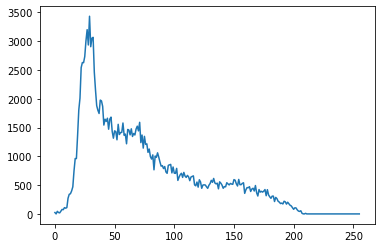

In [43]:
plt.plot(hist_gray_cyclone_image)

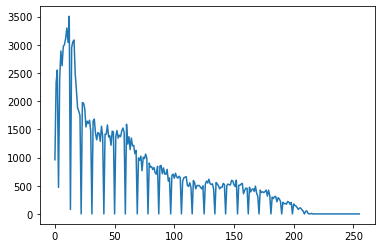

In [44]:
plt.plot(hist_scaled_gray_cyclone_image)